In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,average_salalry,comapny_text,job_state,age,python_yn,R_yn,spark,aws,excel
0,Care Coordinator,£23K-£50K (Glassdoor est.),Altogether Care are looking for a Care Coordin...,3.7,Altogether Care\n3.7,"Weymouth, England",-1,201 to 500 Employees,-1,Company - Private,...,50,36.5,Altogether Care\n,Weymouth,-1,0,0,0,0,1
1,Care Assistant,£20K-£29K (Glassdoor est.),Care Assistant - Tallington Lodge Care Home in...,4.5,Country Court\n4.5,"Tallington, England",-1,1001 to 5000 Employees,1983,Company - Private,...,29,24.5,Country Court\n,Tallington,37,0,0,0,0,1
2,Team Leader,£19K-£24K (Glassdoor est.),Fox Elms DCA\nHours are 37.5\nPay Rate £10.00 ...,3.3,Voyage Care\n3.3,"Gloucester, England",-1,5001 to 10000 Employees,1988,Company - Private,...,24,21.5,Voyage Care\n,Gloucester,32,0,0,0,0,0
3,Warehouse Operative,£21K-£35K (Glassdoor est.),Job Ad\nJoin our team as Warehouse Operatives!...,3.7,VF Corporation\n3.7,"Bardon Mill, England",-1,10000+ Employees,1889,Company - Public,...,35,28.0,VF Corporation\n,Bardon Mill,131,0,0,0,0,1
4,Senior Family Solicitor,£22K-£27K (Glassdoor est.),Optimal Solicitors are a successful niche Lega...,4.1,Optimal Solicitors\n4.1,"Manchester, England",-1,51 to 200 Employees,2008,Private Practice / Firm,...,27,24.5,Optimal Solicitors\n,Manchester,12,0,0,0,0,0


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
       return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data enginerr'
    elif 'ananlyst' in title.lower():
        return 'ananlyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'principal' in title.lower() :
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
        
      

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [5]:
df.job_simp.value_counts()

data scientist    168
na                 18
manager             2
Name: job_simp, dtype: int64

In [6]:
df['seniority'] = df['Job Title'].apply(seniority)

In [7]:
df.seniority.value_counts()

na        187
Senior      1
Name: seniority, dtype: int64

In [8]:
df['comapny_text'] = df.comapny_text.apply(lambda x: x.replace('\n', ''))
df.comapny_text

0         Altogether Care
1           Country Court
2             Voyage Care
3          VF Corporation
4      Optimal Solicitors
              ...        
183              CK Group
184             CatchFish
185             Openreach
186            G-Research
187              Matrix8J
Name: comapny_text, Length: 188, dtype: object

In [9]:
df.describe()

,Rating,Headquarters,Founded,Competitors,min_salary,max_salary,average_salalry,age,python_yn,R_yn,spark,aws,excel
count,188.000000,188.0,188.000000,188.0,188.000000,188.000000,188.000000,188.000000,188.000000,188.0,188.000000,188.000000,188.000000
mean,3.106383,-1.0,1386.553191,-1.0,39.281915,51.127660,45.204787,31.148936,0.718085,0.0,0.218085,0.196809,0.409574
std,1.945092,0.0,907.759711,0.0,7.055191,6.428935,6.303749,57.489540,0.451134,0.0,0.414048,0.398648,0.493068
min,-1.000000,-1.0,-1.000000,-1.0,17.000000,21.000000,19.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.275000,-1.0,-1.000000,-1.0,35.000000,48.000000,44.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,3.800000,-1.0,1982.500000,-1.0,40.000000,52.000000,46.000000,10.500000,1.000000,0.0,0.000000,0.000000,0.000000
75%,4.200000,-1.0,2007.000000,-1.0,46.000000,55.000000,50.500000,28.250000,1.000000,0.0,0.000000,0.000000,1.000000
max,5.000000,-1.0,2019.000000,-1.0,48.000000,57.000000,52.500000,355.000000,1.000000,0.0,1.000000,1.000000,1.000000


<AxesSubplot:>

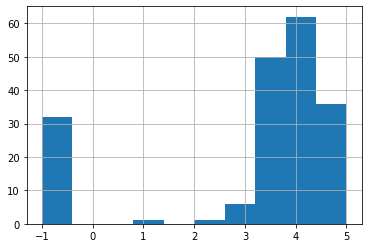

In [10]:
df.Rating.hist()

<AxesSubplot:>

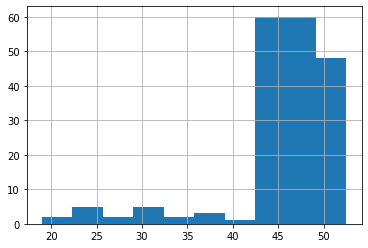

In [11]:
df.average_salalry.hist()

<AxesSubplot:>

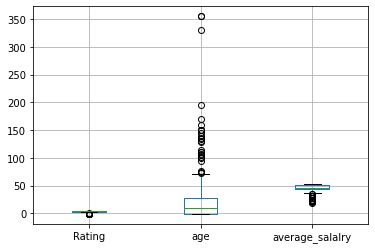

In [12]:
df.boxplot(column =['Rating','age','average_salalry'])

<AxesSubplot:>

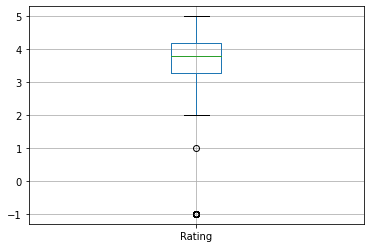

In [13]:
df.boxplot(column =['Rating'])

In [14]:
df[['Rating','age','average_salalry']].corr()

,Rating,age,average_salalry
Rating,1.000000,0.206545,0.102799
age,0.206545,1.000000,0.011639
average_salalry,0.102799,0.011639,1.000000


<AxesSubplot:>

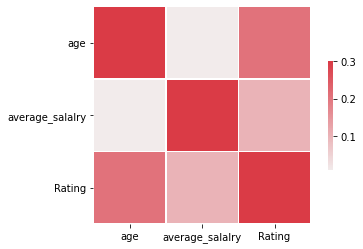

In [15]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','average_salalry','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salalry', 'comapny_text',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority'],
      dtype='object')

In [17]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','comapny_text','job_state', 'python_yn', 'R_yn','spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 69


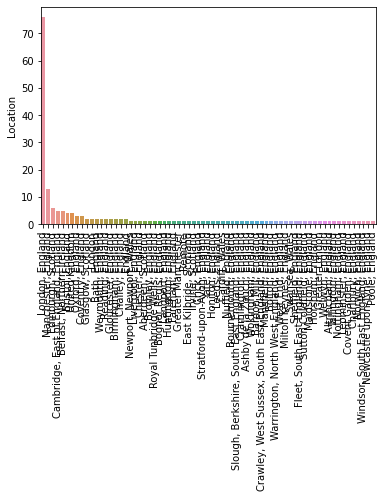

graph for Headquarters: total = 1


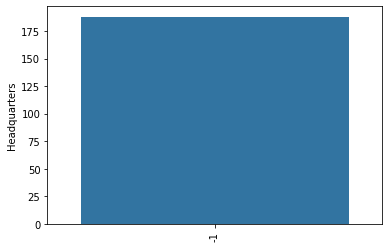

graph for Size: total = 9


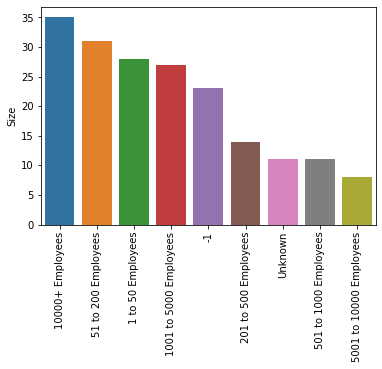

graph for Type of ownership: total = 10


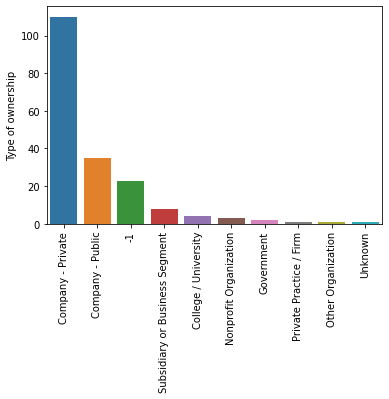

graph for Industry: total = 42


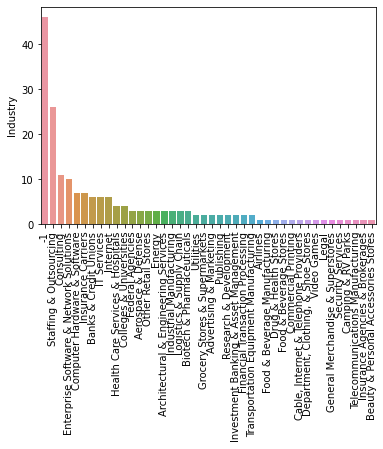

graph for Sector: total = 18


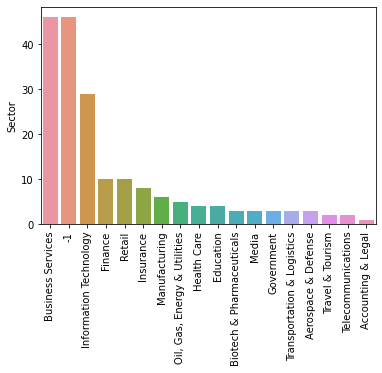

graph for Revenue: total = 14


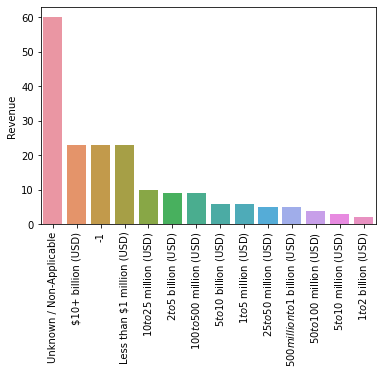

graph for comapny_text: total = 173


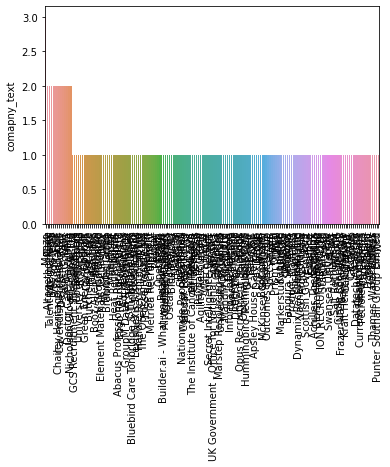

graph for job_state: total = 68


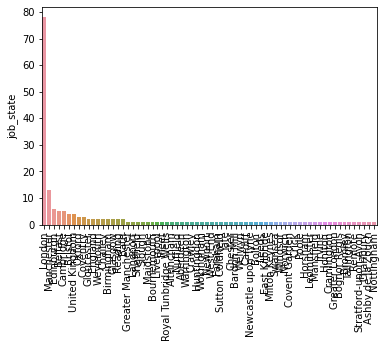

graph for python_yn: total = 2


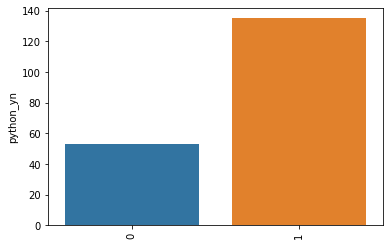

graph for R_yn: total = 1


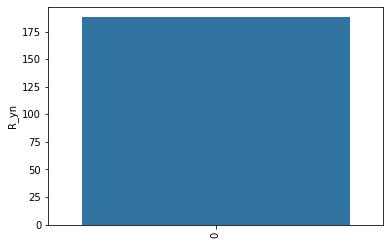

graph for spark: total = 2


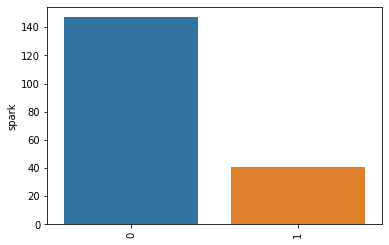

graph for aws: total = 2


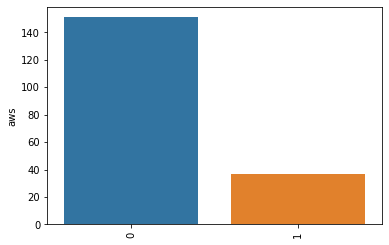

graph for excel: total = 2


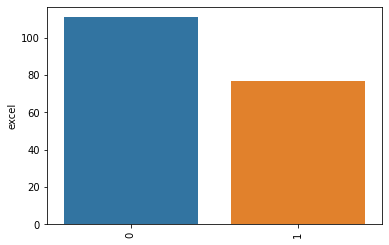

graph for job_simp: total = 3


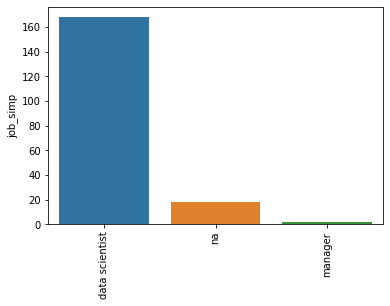

graph for seniority: total = 2


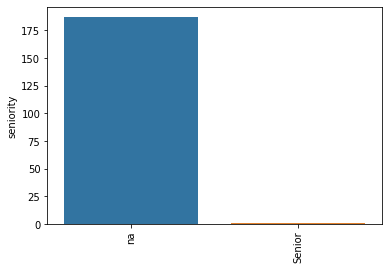

In [18]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [19]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salalry', 'comapny_text',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority'],
      dtype='object')

In [20]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salalry')


,average_salalry
job_simp,
data scientist,47.053571
manager,35.750000
na,29.000000


In [21]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salalry')


average_salalry
job_simp       seniority                 
data scientist na               47.053571
manager        na               35.750000
na             Senior           24.500000
               na               29.264706

In [22]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salalry').sort_values('job_state', ascending = False)


average_salalry
job_state         job_simp                       
Yate              na                         19.0
Wokingham         data scientist             45.0
Windsor           data scientist             50.5
Weymouth          na                         36.5
                  manager                    36.5
...                                           ...
Bath              data scientist             44.5
Bardon Mill       na                         28.0
Ashby de la Zouch data scientist             44.5
Altrincham        data scientist             46.0
Aberdeen          data scientist             46.0

[73 rows x 1 columns]

In [23]:

pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [24]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salalry', aggfunc = 'count').sort_values('job_state', ascending = False)


average_salalry
job_state             job_simp                       
Yate                  na                            1
Wokingham             data scientist                1
Windsor               data scientist                1
Weymouth              na                            1
                      manager                       1
West End              data scientist                1
Welwyn                data scientist                1
Warrington            data scientist                1
United Kingdom        data scientist                4
Tallington            na                            1
Swansea               data scientist                1
Sutton Coldfield      data scientist                1
Stratford-upon-Avon   data scientist                1
Slough                data scientist                1
Sheffield             data scientist                1
Royal Tunbridge Wells manager                       1
Remote                data scientist                1
Reading               data scientist                2
Poole                 data scientist                1
Oxford                data scientist                3
Nuffield              data scientist                1
Nottingham            data scientist                1
Norwich               data scientist                1
Newport               data scientist                1
Newcastle upon Tyne   na                            1
Milton Keynes         data scientist                1
Mansfield             na                            1
Manchester            na                            1
                      data scientist               12
Maidstone             data scientist                1
London                data scientist               78
Liverpool             data scientist                1
Leominster            na                            1
Leeds                 data scientist                1
Langport              na                            1
Irvine                data scientist                1
Huntingdon            data scientist                1
Horsham               na                            1
Honiton               na                            1
Greater Manchester    data scientist                1
Greater London        data scientist                1
Gloucester            na                            1
                      data scientist                1
Glasgow               data scientist                2
Fleet                 data scientist                1
Fareham               data scientist                1
England               data scientist                2
Edinburgh             data scientist                6
East Kilbride         data scientist                1
Crick                 data scientist                1
Crawley               data scientist                1
Cramlington           data scientist                1
Coventry              data scientist                3
Covent Garden         data scientist                1
Chester               na                            1
Charlbury             data scientist                1
Chailey               na                            2
Cardiff               data scientist                1
Cambridge             data scientist                5
Bromley               data scientist                1
Bristol               na                            1
                      data scientist                3
Bournemouth           data scientist                1
Bolton                data scientist                1
Bognor Regis          na                            1
Birmingham            data scientist                2
Belfast               na                            1
                      data scientist                4
Bath                  data scientist                2
Bardon Mill           na                            1
Ashby de la Zouch     data scientist                1
Altrincham            data scientist                1
Aberdeen              data scientist      

In [25]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'average_salalry').sort_values('average_salalry', ascending = False)


,average_salalry
job_state,
Huntingdon,52.500000
Swansea,52.500000
Newport,52.500000
Fleet,52.500000
Charlbury,52.500000
Slough,52.500000
Gloucester,52.500000
Fareham,52.500000
Warrington,50.500000


In [26]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salalry', 'comapny_text',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority'],
      dtype='object')

In [27]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','average_salalry']]


In [28]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'average_salalry').sort_values('average_salalry', ascending = False))

Rating
        average_salalry
Rating                 
 4.6          50.500000
 2.8          50.500000
 4.4          48.916667
 3.1          48.250000
 3.4          47.777778
 5.0          47.500000
 4.7          47.375000
 4.3          47.000000
 4.2          46.576923
 3.5          46.500000
 1.0          46.000000
 3.0          46.000000
 3.8          45.666667
 4.1          45.555556
 3.2          45.357143
 2.7          45.000000
 3.9          44.833333
 2.0          44.500000
 4.9          44.500000
-1.0          44.000000
 4.5          43.900000
 3.7          43.884615
 3.6          42.909091
 4.8          42.900000
 4.0          40.100000
 3.3          38.750000
Industry
                                         average_salalry
Industry                                                
Telecommunications Manufacturing               52.500000
Food & Beverage Manufacturing                  52.500000
Food & Beverage Stores                         50.500000
Cable, Internet & Telephone

ValueError: Grouper for 'average_salalry' not 1-dimensional

In [29]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salalry', aggfunc = 'count')


python_yn,0,1
Revenue,,
$1 to $2 billion (USD),NaN,2.0
$1 to $5 million (USD),2.0,4.0
$10 to $25 million (USD),5.0,5.0
$10+ billion (USD),6.0,17.0
$100 to $500 million (USD),5.0,4.0
$2 to $5 billion (USD),2.0,7.0
$25 to $50 million (USD),1.0,4.0
$5 to $10 billion (USD),1.0,5.0
$5 to $10 million (USD),1.0,2.0


In [30]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [31]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: imshow() missing 1 required positional argument: 'X'

<Figure size 720x720 with 0 Axes>

In [ ]:
df.to_csv('eda_data.csv', index= False)